#[Data Processing Folder from Youtube Video](https://drive.google.com/drive/folders/1vspTb47qRWGH6O7Rr_9ulgo0OkLqmdyN)

## Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import joblib

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

## Importing the dataset

In [ ]:
# Import our data set from the 'AirfoilSelfNoise.csv' file
file_path = f'/content/drive/MyDrive/UCSD AI/AirfoilSelfNoise.csv'
dataset = pd.read_csv(file_path)
#dataset = pd.read_csv('AirfoilSelfNoise.csv')
X1 = dataset.iloc[:, :-1].values
y1 = dataset.iloc[:, -1].values

In [ ]:
print(dataset)
print(X1)
print(y1)

         f  alpha       c  U_infinity     delta     SSPL
0      800    0.0  0.3048        71.3  0.002663  126.201
1     1000    0.0  0.3048        71.3  0.002663  125.201
2     1250    0.0  0.3048        71.3  0.002663  125.951
3     1600    0.0  0.3048        71.3  0.002663  127.591
4     2000    0.0  0.3048        71.3  0.002663  127.461
...    ...    ...     ...         ...       ...      ...
1498  2500   15.6  0.1016        39.6  0.052849  110.264
1499  3150   15.6  0.1016        39.6  0.052849  109.254
1500  4000   15.6  0.1016        39.6  0.052849  106.604
1501  5000   15.6  0.1016        39.6  0.052849  106.224
1502  6300   15.6  0.1016        39.6  0.052849  104.204

[1503 rows x 6 columns]
[[8.00000e+02 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.25000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 ...
 [4.00000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]
 [5.00000e+03 1.56000e+01 1.01600e

## Cleaning Up the Data Set

###Finding outliers

In [ ]:
z_scores = np.abs(zscore(dataset))  #calculate Z-score for all numerical columns
outlier_rows = (z_scores > 3).any(axis=1) #Mark rows where any Z-score exceeds three standard deviations from the mean

outliers = dataset[outlier_rows]

dataset_cleaned = dataset[~outlier_rows] #removing 76 outliers from dataset
dataset_cleaned.to_csv("AirfoilSelfNoise_Cleaned.csv", index=False) #Saving the Cleaned Dataset
print(f"Number of outliers found: {len(outliers)}")
print(dataset_cleaned)

dataset = pd.read_csv('AirfoilSelfNoise_Cleaned.csv')
X2 = dataset.iloc[:, :-1].values
y2 = dataset.iloc[:, -1].values

Number of outliers found: 76
         f  alpha       c  U_infinity     delta     SSPL
0      800    0.0  0.3048        71.3  0.002663  126.201
1     1000    0.0  0.3048        71.3  0.002663  125.201
2     1250    0.0  0.3048        71.3  0.002663  125.951
3     1600    0.0  0.3048        71.3  0.002663  127.591
4     2000    0.0  0.3048        71.3  0.002663  127.461
...    ...    ...     ...         ...       ...      ...
1482  1600   15.6  0.1016        71.3  0.043726  121.528
1483  2000   15.6  0.1016        71.3  0.043726  119.888
1484  2500   15.6  0.1016        71.3  0.043726  118.998
1485  3150   15.6  0.1016        71.3  0.043726  116.468
1486  4000   15.6  0.1016        71.3  0.043726  113.298

[1427 rows x 6 columns]


In [ ]:
print(X2)
print(y2)

[[8.00000e+02 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.25000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 ...
 [2.50000e+03 1.56000e+01 1.01600e-01 7.13000e+01 4.37259e-02]
 [3.15000e+03 1.56000e+01 1.01600e-01 7.13000e+01 4.37259e-02]
 [4.00000e+03 1.56000e+01 1.01600e-01 7.13000e+01 4.37259e-02]]
[126.201 125.201 125.951 ... 118.998 116.468 113.298]


###Filling out missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X2[:,:])
X2[:,:] = imputer.transform(X2[:,:])

In [ ]:
print(X2)

[[8.00000e+02 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.25000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 ...
 [2.50000e+03 1.56000e+01 1.01600e-01 7.13000e+01 4.37259e-02]
 [3.15000e+03 1.56000e+01 1.01600e-01 7.13000e+01 4.37259e-02]
 [4.00000e+03 1.56000e+01 1.01600e-01 7.13000e+01 4.37259e-02]]


Note: There is no need to encode either the independent nor the dependent variables because all of the values when we read the csv file are already floats. Encoding is only needed when there is categorical data or labels

###Filtering Out Duplicates

In [ ]:
dataset_cleaned = dataset.drop_duplicates()
dataset_cleaned.to_csv("AirfoilSelfNoise_Cleaned.csv", index=False) #Saving the Cleaned Dataset
X2 = dataset_cleaned.iloc[:, :-1].values
y2 = dataset_cleaned.iloc[:, -1].values
print(dataset_cleaned)

         f  alpha       c  U_infinity     delta     SSPL
0      800    0.0  0.3048        71.3  0.002663  126.201
1     1000    0.0  0.3048        71.3  0.002663  125.201
2     1250    0.0  0.3048        71.3  0.002663  125.951
3     1600    0.0  0.3048        71.3  0.002663  127.591
4     2000    0.0  0.3048        71.3  0.002663  127.461
...    ...    ...     ...         ...       ...      ...
1422  1600   15.6  0.1016        71.3  0.043726  121.528
1423  2000   15.6  0.1016        71.3  0.043726  119.888
1424  2500   15.6  0.1016        71.3  0.043726  118.998
1425  3150   15.6  0.1016        71.3  0.043726  116.468
1426  4000   15.6  0.1016        71.3  0.043726  113.298

[1427 rows x 6 columns]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[6.30000e+03 4.00000e+00 2.28600e-01 7.13000e+01 4.00603e-03]
 [6.30000e+02 1.12000e+01 5.08000e-02 7.13000e+01 1.40720e-02]
 [1.25000e+03 1.27000e+01 2.54000e-02 7.13000e+01 1.21808e-02]
 ...
 [1.00000e+03 1.74000e+01 2.54000e-02 7.13000e+01 1.61040e-02]
 [8.00000e+02 2.00000e+00 2.28600e-01 7.13000e+01 2.93031e-03]
 [1.00000e+03 1.27000e+01 2.54000e-02 7.13000e+01 1.21808e-02]]


In [ ]:
print(X_test)

[[4.00000e+03 5.40000e+00 1.52400e-01 3.17000e+01 5.25474e-03]
 [2.50000e+03 2.00000e+00 2.28600e-01 3.17000e+01 3.72371e-03]
 [5.00000e+03 9.90000e+00 1.52400e-01 3.96000e+01 2.33328e-02]
 ...
 [6.30000e+02 1.23000e+01 1.01600e-01 3.96000e+01 4.08268e-02]
 [1.60000e+03 1.74000e+01 2.54000e-02 7.13000e+01 1.61040e-02]
 [1.00000e+03 0.00000e+00 2.28600e-01 5.55000e+01 2.29336e-03]]


In [ ]:
print(y_train)

[118.618 133.611 133.048 ... 125.816 128.216 131.698]


In [ ]:
print(y_test)

[116.181 121.407 111.135 128.956 136.536 127.251 125.211 120.856 122.397
 114.477 128.435 121.118 128.252 127.315 127.318 131.718 128.679 125.867
 118.343 126.926 138.274 130.144 131.8   120.509 128.423 113.315 126.838
 127.928 120.607 128.677 121.399 126.648 123.416 125.452 119.174 114.044
 118.134 128.454 115.298 127.404 134.052 131.446 124.17  123.965 121.617
 119.646 127.465 113.333 119.115 124.45  124.106 125.741 117.504 110.224
 115.215 119.777 125.715 130.989 127.591 123.091 137.047 123.537 124.439
 112.506 113.129 119.54  118.441 129.667 121.485 125.837 133.653 116.815
 133.587 118.904 121.635 130.173 130.748 129.949 117.432 131.955 116.849
 133.378 110.515 136.583 124.931 107.985 107.147 118.743 115.846 121.055
 121.146 121.234 119.649 124.273 136.023 115.144 123.263 131.96  130.148
 131.184 123.177 116.22  135.324 132.587 123.311 137.007 108.684 130.777
 135.426 133.956 132.301 121.627 122.708 129.095 124.904 120.569 128.398
 112.251 116.128 111.459 123.742 130.67  132.43  12

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:] = sc.fit_transform(X_train[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

In [ ]:
print(X_train)

[[ 1.56036165 -0.45784308  0.97137371  1.31000086 -0.54291753]
 [-0.78659922  0.78534729 -0.9315848   1.31000086  0.3239825 ]
 [-0.52996505  1.04434528 -1.20343601  1.31000086  0.16110884]
 ...
 [-0.63344657  1.85587233 -1.20343601  1.31000086  0.49898211]
 [-0.71623179 -0.80317374  0.97137371  1.31000086 -0.63556053]
 [-0.63344657  1.04434528 -1.20343601  1.31000086  0.16110884]]


In [ ]:
print(X_test)

[[ 0.60833167 -0.21611162  0.15582007 -1.22011553 -0.4353763 ]
 [-0.01255745 -0.80317374  0.97137371 -1.22011553 -0.56723145]
 [ 1.02225775  0.56088236  0.15582007 -0.71537009  1.12153979]
 ...
 [-0.78659922  0.97527915 -0.38788236 -0.71537009  2.62815554]
 [-0.38509092  1.85587233 -1.20343601  1.31000086  0.49898211]
 [-0.63344657 -1.14850439  0.97137371  0.30050998 -0.69041585]]


## Data Visualization

In [ ]:
#Retrieving column names
feature_names = dataset.drop(columns='SSPL').columns.tolist()
print(feature_names)

['f', 'alpha', 'c', 'U_infinity', 'delta']


In [ ]:
#converting X_train numpy array to DataFrame for easier Data Visualization
df_train = pd.DataFrame(X_train, columns=feature_names)
df_train['SSPL'] = y_train

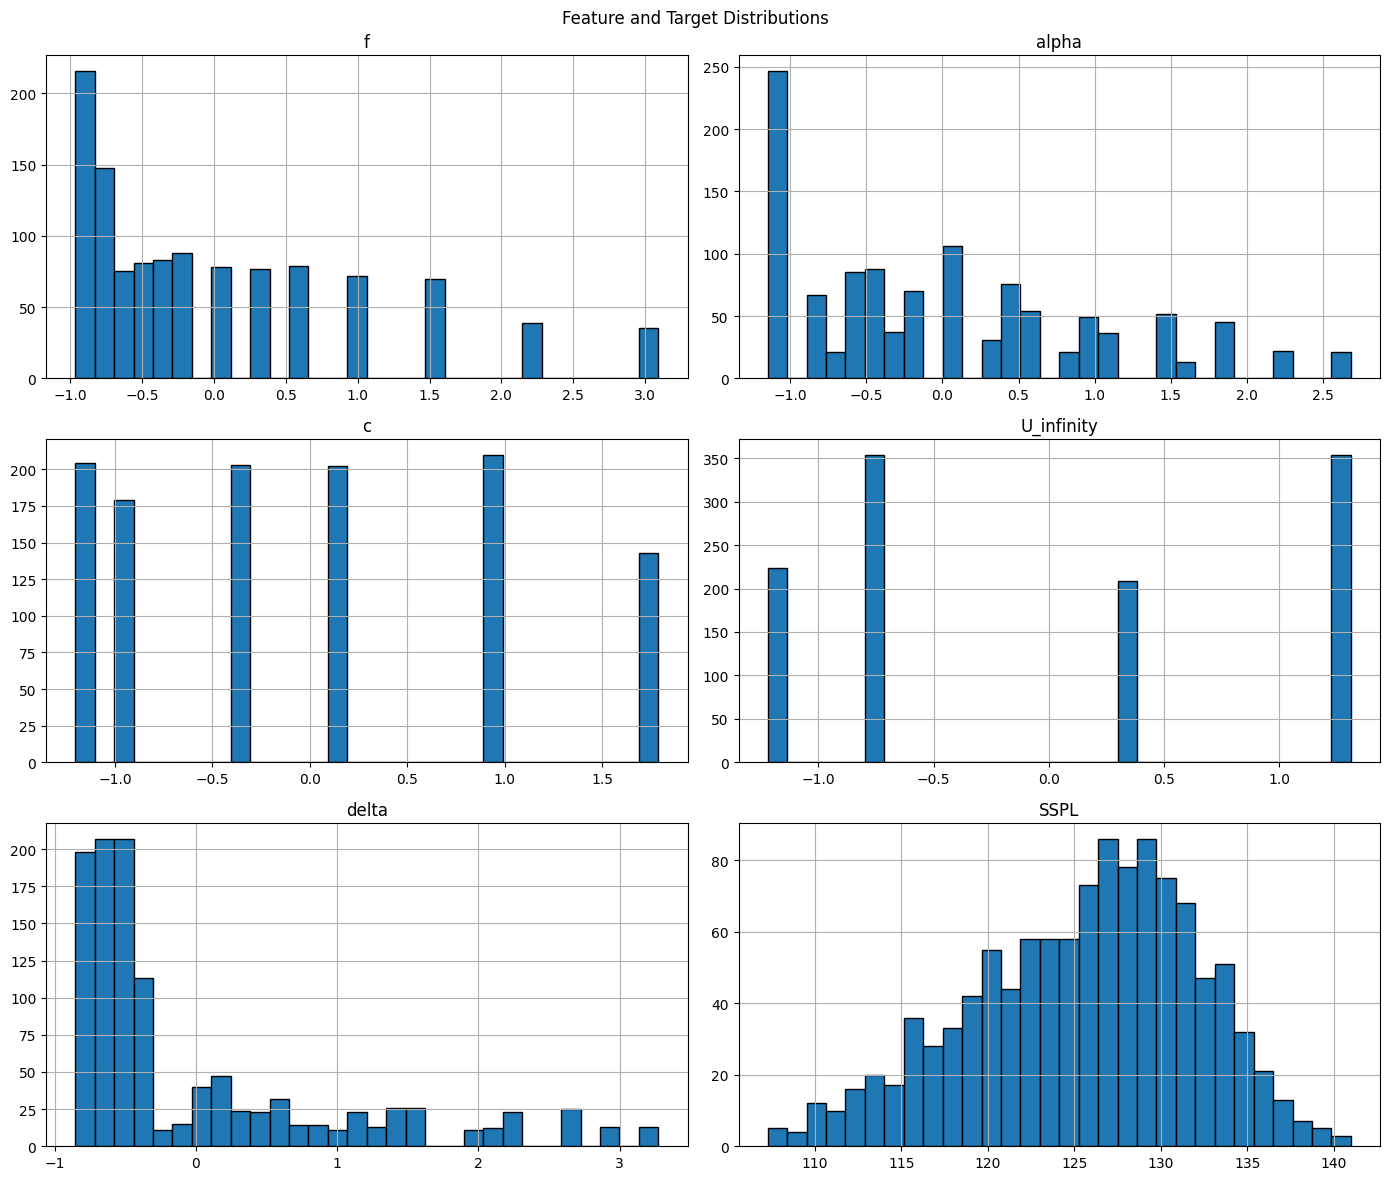

In [ ]:
df_train.hist(figsize=(14, 12), bins=30, edgecolor='black')
plt.suptitle("Feature and Target Distributions")
plt.tight_layout()
plt.show()

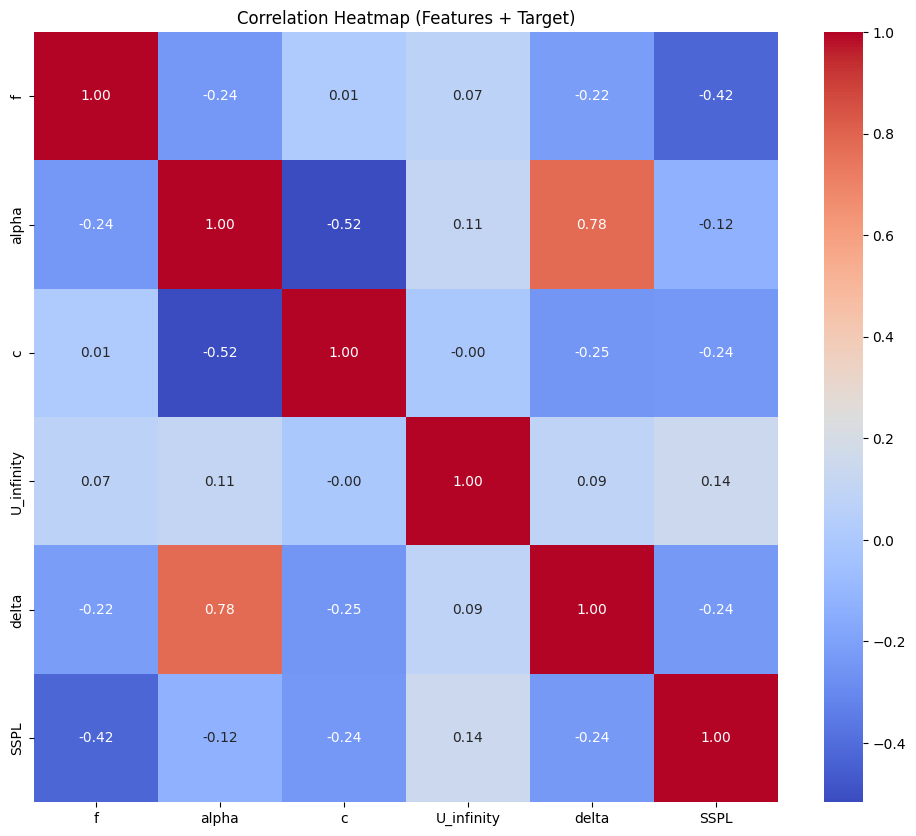

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Features + Target)")
plt.show()

In [ ]:
# Apply Z-score normalization to the features and target variable
df_train_normalized = df_train.copy()
for col in df_train_normalized.columns:
    df_train_normalized[col] = zscore(df_train_normalized[col])

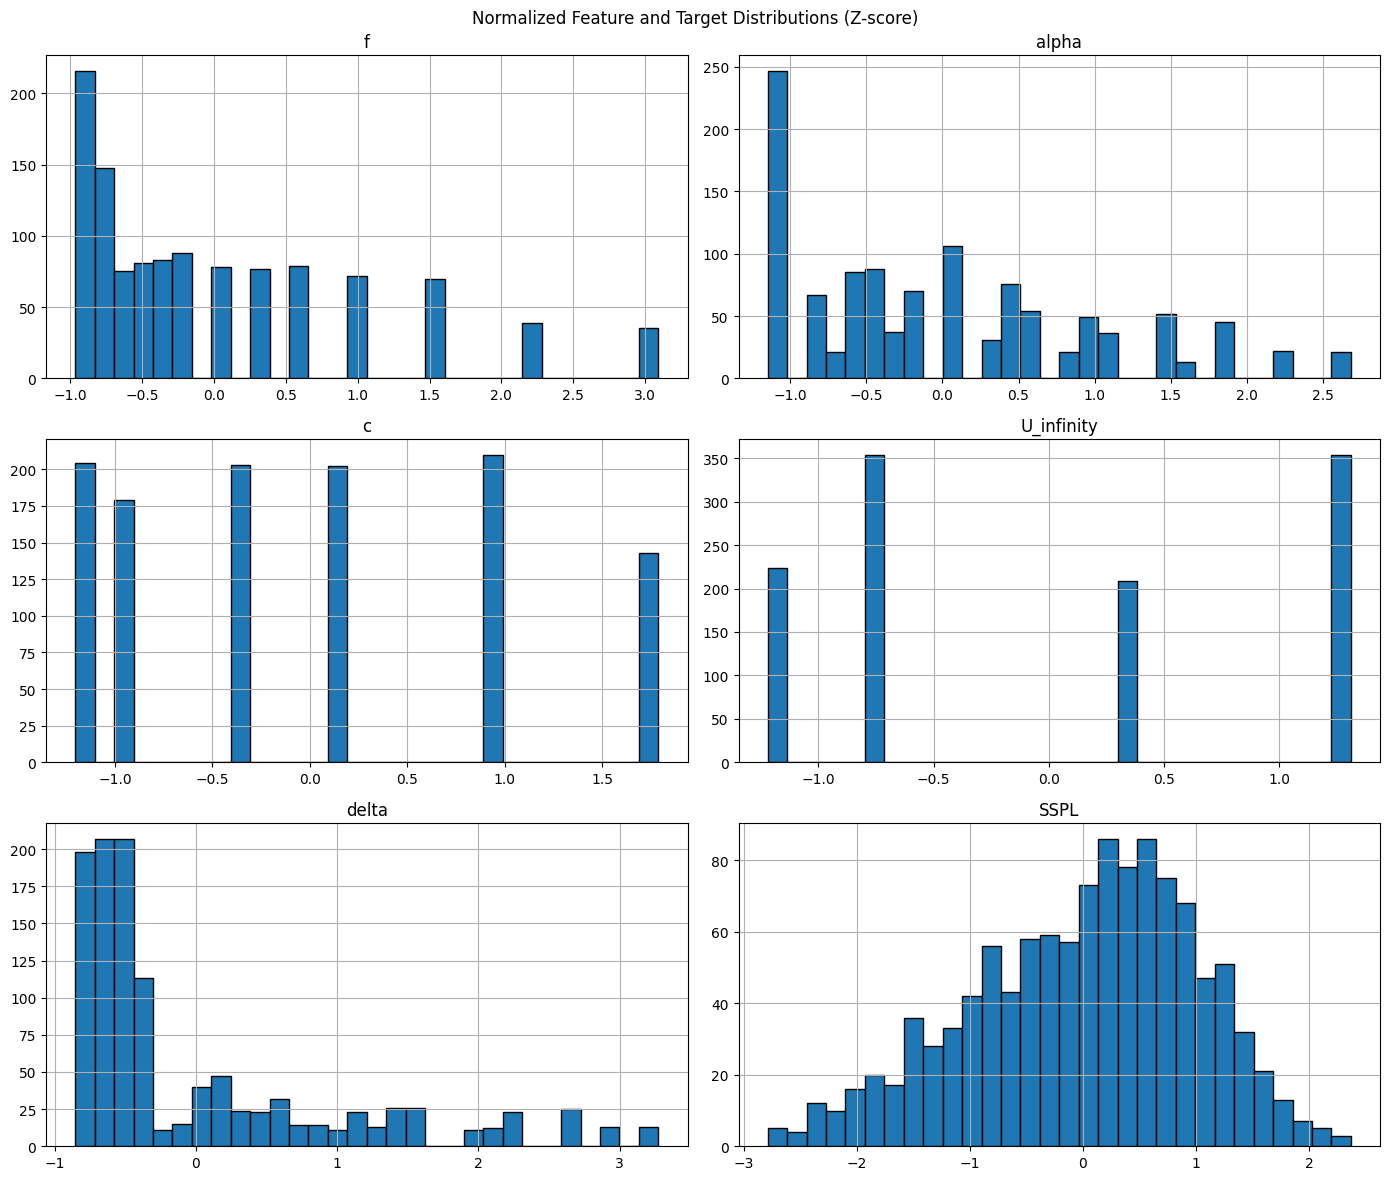

In [ ]:
# Plot histograms of the normalized data
df_train_normalized.hist(figsize=(14, 12), bins=30, edgecolor='black')
plt.suptitle("Normalized Feature and Target Distributions (Z-score)")
plt.tight_layout()
plt.show()

In [ ]:
#converting X_train numpy array to DataFrame for easier Data Visualization
df_train = pd.DataFrame(X_train, columns=feature_names)
df_train['SSPL'] = y_train

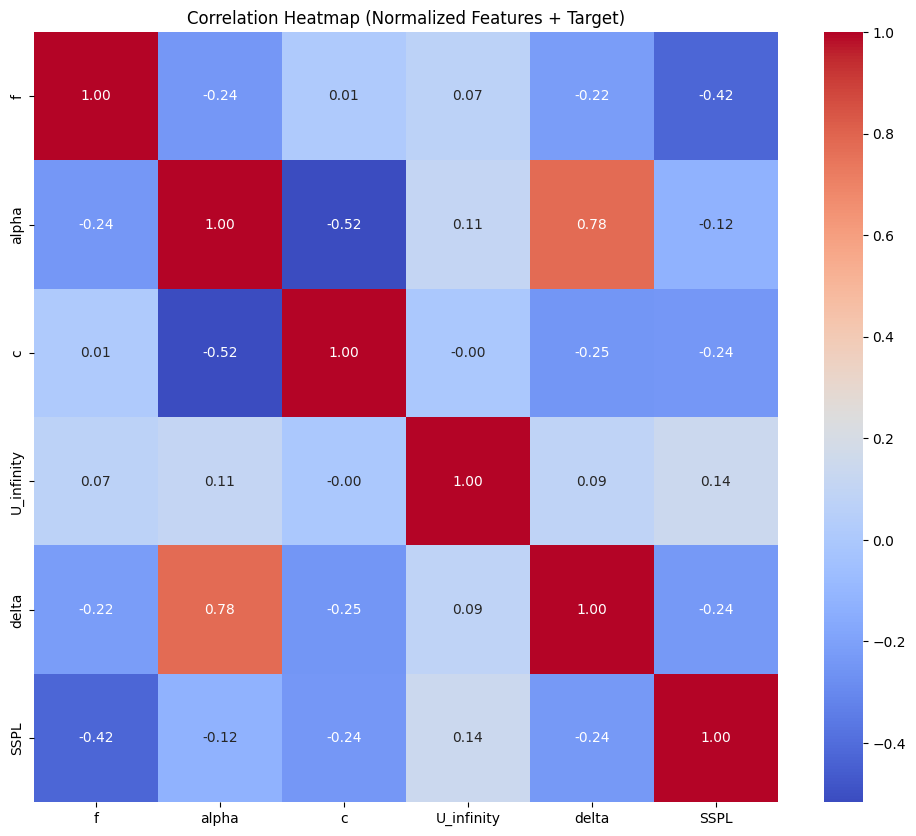

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train_normalized.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Normalized Features + Target)")
plt.show()

## Modeling

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

In [ ]:
dt.score(X_test, y_test)

0.8479942766883493

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
dt_test_mse = mean_squared_error(y_test, dt_pred)
dt_test_r2 = r2_score(y_test, dt_pred)

print ('MSE: ', dt_test_mse)
print ('R2: ', dt_test_r2)

MSE:  6.70471162937063
R2:  0.8479942766883493


### Gradient Boosting Decision Tree Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_pred = gbr.predict(X_test)

In [ ]:
gbr.score(X_test, y_test)

0.8245139724485423

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
gbr_test_mse = mean_squared_error(y_test, gbr_pred)
gbr_test_r2 = r2_score(y_test, gbr_pred)

print ('MSE: ', gbr_test_mse)
print ('R2: ', gbr_test_r2)

MSE:  7.740387559644815
R2:  0.8245139724485423


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr.predict(X_test)

In [ ]:
# Evaluate the Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score

lr_test_mse = mean_squared_error(y_test, lr_pred)
lr_test_r2 = r2_score(y_test, lr_pred)

print('Linear Regression:')
print('MSE: ', lr_test_mse)
print('R2: ', lr_test_r2)

Linear Regression:
MSE:  22.639494582017743
R2:  0.4867291929044767


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)

rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rfr.score(X_test, y_test)

0.9269283503937911

In [ ]:
rfr_pred = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rfr_test_mse = mean_squared_error(y_test, rfr_pred)
rfr_test_r2 = r2_score(y_test, rfr_pred)

print ('MSE: ', rfr_test_mse)
print ('R2: ', rfr_test_r2)

MSE:  3.2230650808297163
R2:  0.9269283503937911


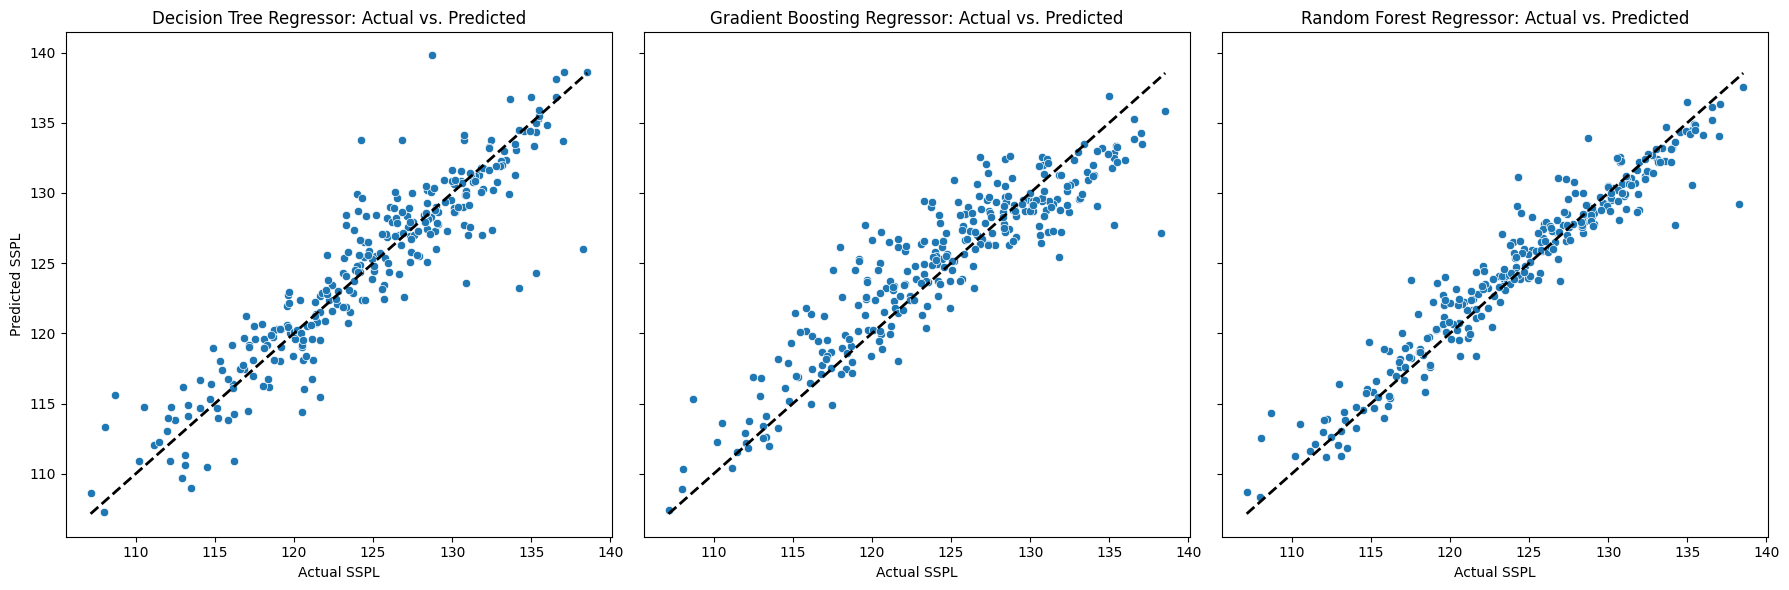

['model.pkl']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrames for plotting
dt_results = pd.DataFrame({'Actual': y_test, 'Predicted': dt_pred})
gbr_results = pd.DataFrame({'Actual': y_test, 'Predicted': gbr_pred})
rfr_results = pd.DataFrame({'Actual': y_test, 'Predicted': rfr_pred})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.scatterplot(x='Actual', y='Predicted', data=dt_results, ax=axes[0])
axes[0].set_title('Decision Tree Regressor: Actual vs. Predicted')
axes[0].set_xlabel('Actual SSPL')
axes[0].set_ylabel('Predicted SSPL')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add diagonal line

sns.scatterplot(x='Actual', y='Predicted', data=gbr_results, ax=axes[1])
axes[1].set_title('Gradient Boosting Regressor: Actual vs. Predicted')
axes[1].set_xlabel('Actual SSPL')
axes[1].set_ylabel('Predicted SSPL')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add diagonal line


sns.scatterplot(x='Actual', y='Predicted', data=rfr_results, ax=axes[2])
axes[2].set_title('Random Forest Regressor: Actual vs. Predicted')
axes[2].set_xlabel('Actual SSPL')
axes[2].set_ylabel('Predicted SSPL')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add diagonal line


plt.tight_layout()
plt.show()

joblib.dump(rfr, "model.pkl")

# Task
Tune the Random Forest Regressor model to improve its performance.

## Model tuning

### Subtask:
Tune the Random-Forest-Regressor model to improve its performance.


**Reasoning**:
Import necessary libraries and define the parameter grid for GridSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)

**Reasoning**:
Now, I will fit the `GridSearchCV` object to the training data to find the best hyperparameters and then print them.



In [ ]:
grid_search.fit(X_train, y_train)
print("Best hyperparameters found: ", grid_search.best_params_)

Best hyperparameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## Model evaluation

### Subtask:
Evaluate the tuned model.


**Reasoning**:
Now that the grid search has been performed and the best hyperparameters have been found, the next step is to evaluate the performance of the tuned model. This involves getting the best estimator from the grid search, making predictions on the test set, and calculating the MSE and R-squared score. I will combine these steps into one code block for efficiency.



In [ ]:
best_rfr = grid_search.best_estimator_

best_rfr_pred = best_rfr.predict(X_test)

best_rfr_test_mse = mean_squared_error(y_test, best_rfr_pred)
best_rfr_test_r2 = r2_score(y_test, best_rfr_pred)

print('Tuned Random Forest Regressor:')
print('MSE: ', best_rfr_test_mse)
print('R2: ', best_rfr_test_r2)

Tuned Random Forest Regressor:
MSE:  3.204820962920812
R2:  0.9273419715146127


## Model comparison

### Subtask:
Compare the performance of the tuned model with the original Random Forest model to see if we've made an improvement.


**Reasoning**:
I will create a pandas DataFrame to compare the R2 and MSE scores of the original and tuned Random Forest models, as requested in the instructions. The DataFrame will have two rows and two columns, populated with the relevant performance metrics. Finally, I will print the DataFrame to display the comparison.



In [ ]:
comparison_df = pd.DataFrame({
    'R2 Score': [rfr_test_r2, best_rfr_test_r2],
    'MSE': [rfr_test_mse, best_rfr_test_mse]
}, index=['Original Random Forest', 'Tuned Random Forest'])

print(comparison_df)

                        R2 Score       MSE
Original Random Forest  0.926928  3.223065
Tuned Random Forest     0.927342  3.204821


## Summary:

### Data Analysis Key Findings
* The Random Forest Regressor model was tuned using `GridSearchCV` to find the optimal hyperparameters, which were determined to be a `max_depth` of 20, `min_samples_leaf` of 1, `min_samples_split` of 2, and `n_estimators` of 300.
* After tuning, the model's performance was evaluated, resulting in a Mean Squared Error (MSE) of 3.20 and an R-squared (R2) score of 0.93.
* A comparison between the original and tuned models revealed a slight improvement in performance, with the tuned model showing a higher R2 score (0.9273 vs. 0.9269) and a lower MSE (3.20 vs. 3.22).

### Insights or Next Steps
* The marginal improvement suggests that the default hyperparameters of the Random Forest Regressor were already quite effective for this dataset, or the search grid for hyperparameter tuning could be expanded.
* Further performance gains might be achieved by exploring other feature engineering techniques or trying different regression models.
